In [1]:
import time
import copy
import numpy as np
import pandas as pd

In [2]:
stockname = 'TSLA'
filepath = 'input/Data/Stocks/' + stockname + '.csv'
data = pd.read_csv(filepath)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
print(data.index.min(), data.index.max())
data.head()

2010-06-29 00:00:00 2022-12-13 00:00:00


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500.0


In [3]:




data['increase'] = (data['Open'] < data['Open'].shift(-1)).astype(int)


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,increase
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500.0,1
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500.0,0
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000.0,0
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000.0,0
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500.0,0


In [5]:
data = data.drop(columns=['High','Low','Close','Adj Close','Volume'])


In [6]:
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2020-12-31')

# Filter the DataFrame
df = data.loc[start_date:end_date]
df.head()

,Open,increase
Date,,
2019-01-02,20.406668,1
2019-01-03,20.466667,0
2019-01-04,20.400000,1
2019-01-07,21.448000,1
2019-01-08,22.797333,0


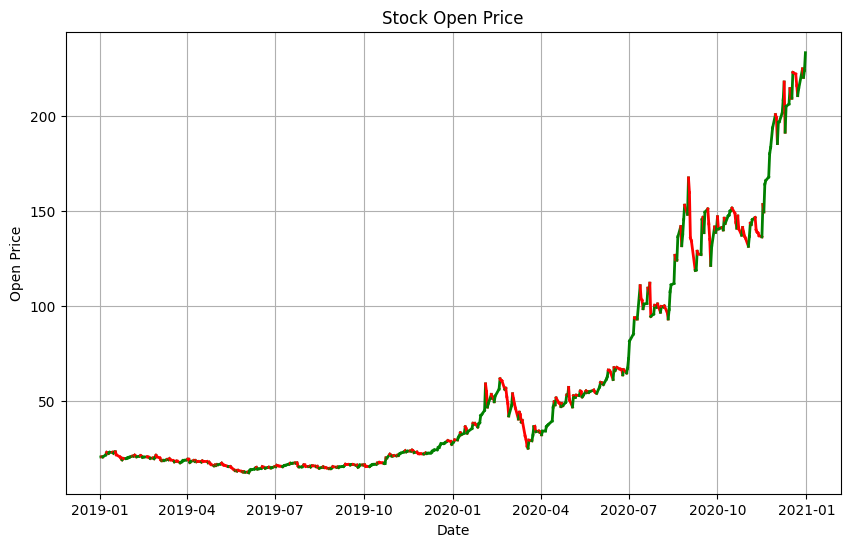

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot each segment of the line with the appropriate color
for i in range(1, len(df)):
    color = 'green' if df['Open'].iloc[i] > df['Open'].iloc[i-1] else 'red'
    plt.plot(df.index[i-1:i+1], df['Open'].iloc[i-1:i+1], color=color, linewidth=2)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Stock Open Price')
plt.grid(True)

# Show the plot
plt.show()